In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle/Electric_Vehicle_Population_Data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/kaggle/input/electric-vehicle/Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,124535071,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,102359449,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJXCDE28G,King,Kent,WA,98031.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,33.0,228682037,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,234923230,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162998,7SAYGAEE6P,Whatcom,Bellingham,WA,98225.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,236252152,POINT (-122.486115 48.761615),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
162999,7SAYGDEE4P,King,Vashon,WA,98070.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,34.0,224470599,POINT (-122.46049 47.44873),CITY OF TACOMA - (WA),5.303303e+10
163000,7SAYGDEE0P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244676939,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
163001,JTDKARFP7H,Pierce,Spanaway,WA,98387.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,2.0,276466165,POINT (-122.435115 47.1045),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


**Here,the dataset will be in the .csv file and to convert in to pandas .read_csv() is used.In the brackets we will give path of the dataset so that which it means dataset from csv to pandas and we will print the data by giving data in the next line and it prints all the values of the dataset including all columns and rows.**

In [5]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,124535071,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,102359449,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJXCDE28G,King,Kent,WA,98031.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,33.0,228682037,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,234923230,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


**data.head() will prints the first 5 observations of the dataset which means like head is at the top and after printing we can see the first 5 observations as output.**

In [6]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
162998,7SAYGAEE6P,Whatcom,Bellingham,WA,98225.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,236252152,POINT (-122.486115 48.761615),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
162999,7SAYGDEE4P,King,Vashon,WA,98070.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,34.0,224470599,POINT (-122.46049 47.44873),CITY OF TACOMA - (WA),5.303303e+10
163000,7SAYGDEE0P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244676939,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
163001,JTDKARFP7H,Pierce,Spanaway,WA,98387.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,2.0,276466165,POINT (-122.435115 47.1045),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
163002,3FMTK3SU7N,Spokane,Spokane,WA,99203.0,2022,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,6.0,197399828,POINT (-117.425265 47.635365),MODERN ELECTRIC WATER COMPANY,5.306300e+10


**data.tail() will prints the last 5 observations of the dataset which means like tail is at the back and after printing we can see the last 5 observations as output.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163003 entries, 0 to 163002
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         163003 non-null  object 
 1   County                                             162999 non-null  object 
 2   City                                               162999 non-null  object 
 3   State                                              163003 non-null  object 
 4   Postal Code                                        162999 non-null  float64
 5   Model Year                                         163003 non-null  int64  
 6   Make                                               163003 non-null  object 
 7   Model                                              163003 non-null  object 
 8   Electric Vehicle Type                              163003 non-null  object

**data.info() function is used to find all the information of the dataset.after printing the output we can see that the information of all the 16 coloumns are provided and the information about each coloumn describes about them.for example,lets take fifth coloumn i.e.model year and it has no null values and the data type is integer and describes as int64 which means integer of type 64 bits.similarly for all the coloumns and at the end it shows count of each data type.It has 3 data types of float of 64 bits and 4 int64 and 10 objects.**

In [8]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 366
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

**Here is null is used to find the null values of the respected columns data and isnull().sum() is to find the total null values that are there in the respected coloumn of the dataset and the datatype is integer and it is shown as int64 because of we are counting the no of null values and the count replicates in the result if there are null values in respected coloumn of the dataset**

In [9]:
(df.isnull().sum()/len(df))*100

VIN (1-10)                                           0.000000
County                                               0.002454
City                                                 0.002454
State                                                0.000000
Postal Code                                          0.002454
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.224536
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.005521
Electric Utility                                     0.002454
2020 Cen

**It finds the percentage of the null values of each coloumn**

In [10]:
df.fillna(df.mean(numeric_only=True).round(1),inplace=True)
df.fillna(df.median(numeric_only=True).round(1),inplace=True)
df.isnull().sum()

VIN (1-10)                                           0
County                                               4
City                                                 4
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     9
Electric Utility                                     4
2020 Census Tract                                    0
dtype: int64

**Mean and median method to replace null values of numerical data type:**
Here,fillna function is used to fill the null values of the numerical typesThis method involves replacing missing values with computed averages. Filling missing data with a mean or median value is applicable when the columns involved have integer or float data types.You can also fill in missing data with the mode value, which is the most occurring value. This is also applicable to integers or floats. But it's handier when the columns in question contain strings.

In [11]:
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].fillna(df[string_columns].mode().iloc[0])
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

**Here also fillna function is used to fill the null values of the string data types.Since you can't calculate numeric averages on string columns, you want to get the modal value for them instead.The above code will select only string columns from the DataFrame and fill the Nan in each with its modal value.**

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,163003.0,9.817072e+04,2.467969e+03,1.730000e+03,9.805200e+04,9.812200e+04,9.837000e+04,9.957700e+04
Model Year,163003.0,2.020258e+03,3.005057e+00,1.997000e+03,2.018000e+03,2.021000e+03,2.023000e+03,2.024000e+03
Electric Range,163003.0,6.338218e+01,9.432306e+01,0.000000e+00,0.000000e+00,1.300000e+01,8.400000e+01,3.370000e+02
Base MSRP,163003.0,1.198345e+03,8.825506e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,163003.0,2.922680e+01,1.482504e+01,1.000000e+00,1.800000e+01,3.300000e+01,4.200000e+01,4.900000e+01
DOL Vehicle ID,163003.0,2.153918e+08,7.874180e+07,4.385000e+03,1.762441e+08,2.209718e+08,2.495753e+08,4.792548e+08
2020 Census Tract,163003.0,5.297368e+10,1.612957e+09,1.081042e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10


**describe() function is used to find out the statistics values which includes mean,count,std,min,25%,50%,75%,max and here it chooses only of datatypes integer or float values or numerical data types.To include including non numerical data the following change in the code requires from the previous ones.**

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
VIN (1-10),163003,10086,7SAYGDEE6P,1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County,163003,186,King,84944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,163003,706,Seattle,27438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,163003,45,WA,162637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,163003.0,NaN,NaN,NaN,98170.717421,2467.968702,1730.0,98052.0,98122.0,98370.0,99577.0
Model Year,163003.0,NaN,NaN,NaN,2020.258449,3.005057,1997.0,2018.0,2021.0,2023.0,2024.0
Make,163003,39,TESLA,73587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,163003,136,MODEL Y,31640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electric Vehicle Type,163003,2,Battery Electric Vehicle (BEV),127102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clean Alternative Fuel Vehicle (CAFV) Eligibility,163003,3,Eligibility unknown as battery range has not b...,79957,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Here,from the previous one we came to know that by including non numerical data it gives three more extra features unique,top,freq which will be used for non numerical data types and rest of the data types have null values and similarly for the other ones it shows values and for the non numerical it shows null values.**

<Axes: >

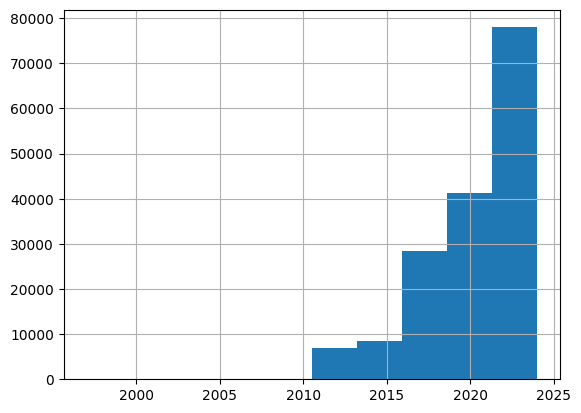

In [14]:
df['Model Year'].hist()

**Here,hist() is used i.e.histogram function basically and df['Model Year'] which means df data function model year is plotted and the visualization is shown in the above histogram plot.**

<Axes: title={'center': 'Distribution'}, xlabel='Model Year'>

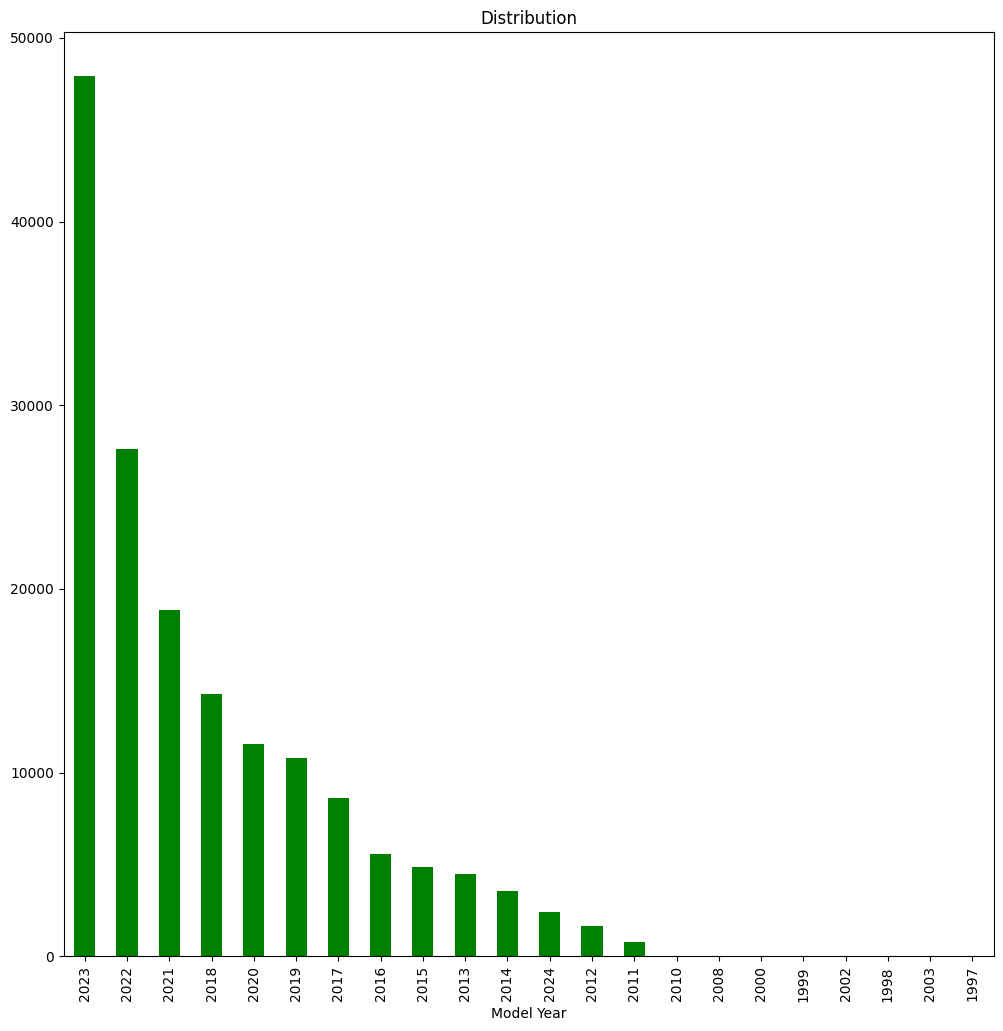

In [15]:
df['Model Year'].value_counts().plot(kind = 'bar', 
                                 figsize = (12, 12), 
                                 title = 'Distribution', 
                                 cmap = 'ocean')

**Here,from the previous ones bar is used than hist so that visually it looks better and here we use counts function which counts how many same model years are used and it is shown xlabel as model year and ylabel is the count and bar plot is more visual than histogram plot** 

In [16]:
df['State'].value_counts()

State
WA    162637
CA        99
VA        40
MD        34
TX        22
IL        15
NC        14
CO        12
FL         9
NJ         9
HI         8
AZ         8
SC         7
OR         7
NY         7
GA         7
CT         7
NV         6
LA         5
MA         4
MO         4
NE         3
OH         3
KY         3
PA         3
DC         3
AL         3
AR         2
BC         2
IN         2
ID         2
UT         2
KS         2
MT         1
NH         1
DE         1
WY         1
AP         1
AK         1
OK         1
IA         1
MS         1
AE         1
MI         1
MN         1
Name: count, dtype: int64

<Axes: title={'center': 'Distribution'}, xlabel='State'>

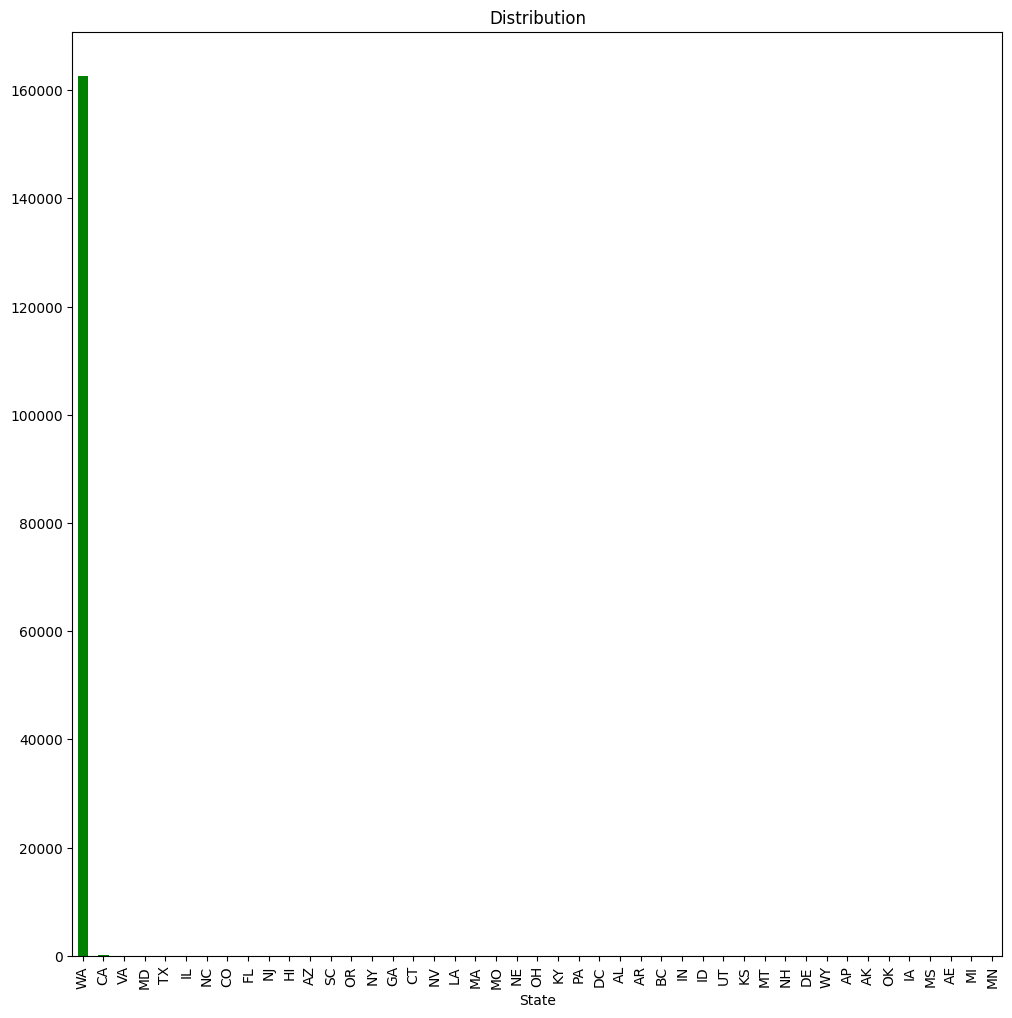

In [17]:
df['State'].value_counts().plot(kind = 'bar', 
                                 figsize = (12, 12), 
                                 title = 'Distribution', 
                                 cmap = 'ocean')

**Here,bar() is used i.e.bar graph visualisation happens  and df['state'] which means df data function state is plotted and the visualization is shown in the above bar graph and value count function is also used for each state counting happens and plotted i.e on y-axis and as shown xlabel is given as state.**

<Axes: ylabel='count'>

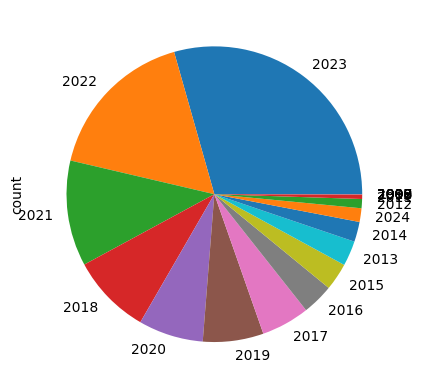

In [18]:
df['Model Year'].value_counts().plot.pie()

**It plots the count of years in the plot diagram as shown above.**